<a href="https://colab.research.google.com/github/omoghaoghenemano/handwritten-prediction/blob/master/ailab22_intro_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied AI Lab WS2022 Introductory Task

Please solve the following task as part of your application to the Applied AI Lab.
Since the lab depends on the participants being able to implement (deep) machine learning solutions, solving this task is a requirement for acceptance.
However, it is not important to maximize the performance or do excessive optimization.

You are given a dataset (in Studip) of handwritten numbers with two digits.
Your task is to construct and train a classifier to predict the number from the image input.
Specifically, please:
1. Train an sklearn classifier for this task.
2. Train a deep learning model for this task with testing accuracy over 80% (there is no hidden test set, so do not overfit on the given test data).
3. Send a link to your solution (a single Google Colab notebook) as part of your application mail.

Additional information:
* The dataset can be easily loaded with `torchvision.datasets.ImageFolder`.
* You can use any deep learning framework you are comfortable with.
* We recommend working on Google Colab. To have access to the dataset, see https://colab.research.google.com/notebooks/io.ipynb.



In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

Load data

In [2]:
import zipfile

zip_file_path = '/media/images.zip'

extract_folder_path = '/media'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

In [3]:



train_data_path = '/media/images/train'
test_data_path = '/media/images/test'

image_size = (64, 64)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to be between 0 and 1
    validation_split=0.2
)


train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_path,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    seed=123,
)
validation_dataset = train_datagen.flow_from_directory(
    train_data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Assumes a classification task, adjust accordingly
    subset="validation",
)

# Create the testing dataset
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values for testing
test_dataset = test_datagen.flow_from_directory(
    test_data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Assumes a classification task, adjust accordingly
)


class_names = train_dataset.class_names
print("Class Names:", class_names)

# Example: Iterate through a batch of the training dataset
for images, labels in train_dataset.take(1):
    print("Batch shape:", images.shape)
    print("Labels:", labels.numpy())


Found 10000 files belonging to 100 classes.
Found 1960 images belonging to 100 classes.
Found 1000 images belonging to 100 classes.
Class Names: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
Batch shape: (32, 64, 64, 3)
Labels: [53  4  0 25 33 62 69 41 60 44  2 33 47  3 12 55 77 55 20 90 31 64 83 37
 22 41  8 72 85 60 16 49]


Found 8040 images belonging to 100 classes.


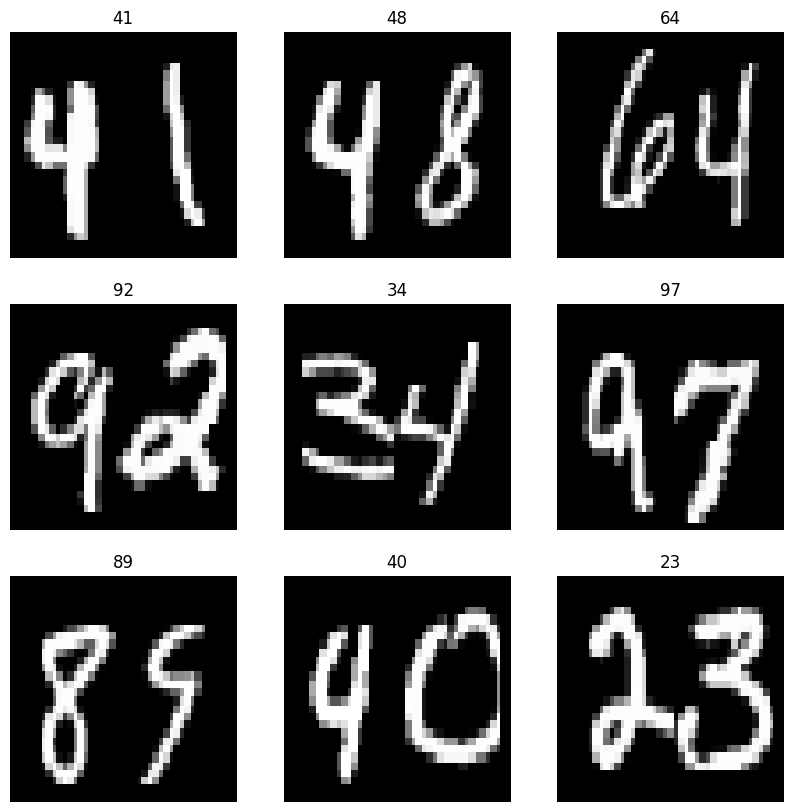

In [4]:
image_size = (64, 64)
batch_size = 32


train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_dataset = train_datagen.flow_from_directory(
    train_data_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset="training",
)


class_names = train_dataset.class_indices
class_names = list(class_names.keys())


images, labels = next(train_dataset)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[tf.argmax(labels[i])])
    plt.axis("off")
plt.show()

In [18]:
num_classes = len(train_dataset.class_indices)


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu' ))
model.add(layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))


model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])


num_epochs = 40
history = model.fit(
    train_dataset,
    epochs=num_epochs,
    validation_data=validation_dataset
)


test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/40
252/252 [==============================] - 36s 141ms/step - loss: 3.0039 - accuracy: 0.3729 - val_loss: 1.7162 - val_accuracy: 0.6128
Epoch 2/40
252/252 [==============================] - 35s 137ms/step - loss: 1.0874 - accuracy: 0.7846 - val_loss: 1.2990 - val_accuracy: 0.7117
Epoch 3/40
252/252 [==============================] - 37s 148ms/step - loss: 0.5981 - accuracy: 0.9137 - val_loss: 1.2079 - val_accuracy: 0.7500
Epoch 4/40
252/252 [==============================] - 36s 143ms/step - loss: 0.3857 - accuracy: 0.9652 - val_loss: 1.1092 - val_accuracy: 0.7566
Epoch 5/40
252/252 [==============================] - 35s 138ms/step - loss: 0.2981 - accuracy: 0.9841 - val_loss: 1.1584 - val_accuracy: 0.7638
Epoch 6/40
252/252 [==============================] - 33s 133ms/step - loss: 0.2340 - accuracy: 0.9942 - val_loss: 1.1625 - val_accuracy: 0.7444
Epoch 7/40
252/252 [==============================] - 38s 150ms/step - loss: 0.2170 - accuracy: 0.9892 - val_loss: 1.1114 - val_ac

# New section

In [19]:
test_image_path = '/media/images/test/11/108.png'
test_image = image.load_img(test_image_path, target_size=image_size)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image /= 255.0


prediction = model.predict(test_image)
predicted_class = np.argmax(prediction)

class_indices = {v: k for k, v in train_dataset.class_indices.items()}
predicted_class_name = class_indices[predicted_class]

print(f'Predicted class: {predicted_class_name}')

1/1 [==============================] - 0s 67ms/step
Predicted class: 11


# New section